This notebook will compare the abundance from Multinet, Tucker Trawl and Pelagic Trawl from the 2018 Sea Patches cruise in trosøflaket

In [2]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools
import seaborn as sns

In [3]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}


## MultiNetTrawl
Hydrobios Multinet (0.25 m2) with mesh size 180 μm. Samples were taken from 5 depth strata. I will only use depth 0, 5 and 10 and 30 m. Unfortunately at station 7 the multinet did not close.

In [4]:
xls_Multi = pd.ExcelFile('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_Multinet.xlsx')
Multi_species = xls_Multi.parse(2)
#Multi_species.index = Multi_species['Species']
#Multi_species = Multi_species.drop(['Species'], axis=1)
pd.set_option('display.max_rows', None)
Multi_species.round(1)


,Species,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17
0,Calanus finmarchicus AM,0.0,6.0,7.1,21.5,25.9,22.6,11.4,1.9,8.7,5.8,7.2
1,C. finmarchicus AF,238.6,154.3,171.5,748.0,194.1,381.9,372.9,527.4,398.2,148.8,27.6
2,C. finmarchicus CV,5282.7,4039.2,2406.8,19036.2,6915.0,6597.5,8005.0,6300.2,2167.7,4112.5,393.7
3,C. finmarchicus CIV,302.2,167.0,132.9,340.6,129.3,146.3,103.6,331.8,80.1,190.5,43.5
4,C. finmarchicus CIII,30.6,7.0,10.8,7.8,2.7,43.6,6.9,33.4,15.3,35.0,7.7
5,C. finmarchicus CII,7.3,13.1,3.4,6.9,0.0,32.0,3.8,22.9,14.1,14.9,15.3
6,C. finmarchicus CI,0.0,13.9,3.8,11.0,0.0,23.6,1.0,29.9,19.1,21.3,23.9
7,C. hyperboreus CIV,0.0,6.5,14.5,14.5,0.6,9.7,0.3,2.8,9.5,0.8,0.8
8,C. hyperboreus CIII,0.0,2.2,18.4,28.2,17.1,3.6,0.6,0.1,2.6,2.6,0.0
9,Microcalanus spp.,628.6,77.4,87.5,81.5,125.1,324.6,240.0,33.1,129.7,64.0,310.1


In [5]:
Multinet_df = xls_Multi.parse(0)
Multinet_df['Trawl'] = 'Multinet'
Multinet_df.index = Multinet_df['Species']
Multinet_df = Multinet_df.drop(['Species'], axis=1)

In [6]:
Multinet_df.round(3)

,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17,Trawl
Species,,,,,,,,,,,,
Calanus,0.969,0.968,0.965,0.987,0.936,0.944,0.849,0.966,0.900,0.990,0.913,Multinet
Krill,0.010,0.001,0.004,0.001,0.003,0.005,0.003,0.003,0.005,0.001,0.004,Multinet
Amphipod,0.000,0.000,0.001,0.001,0.001,0.001,0.000,0.000,0.001,0.000,0.000,Multinet
Limacina,0.013,0.019,0.012,0.003,0.016,0.029,0.137,0.014,0.054,0.005,0.005,Multinet
Gelatinous,0.004,0.007,0.013,0.005,0.041,0.019,0.009,0.013,0.036,0.004,0.064,Multinet
Fish Larvae,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Multinet
Other,0.004,0.004,0.005,0.002,0.004,0.002,0.001,0.004,0.005,0.000,0.014,Multinet
Cod,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Multinet
Capelin,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Multinet


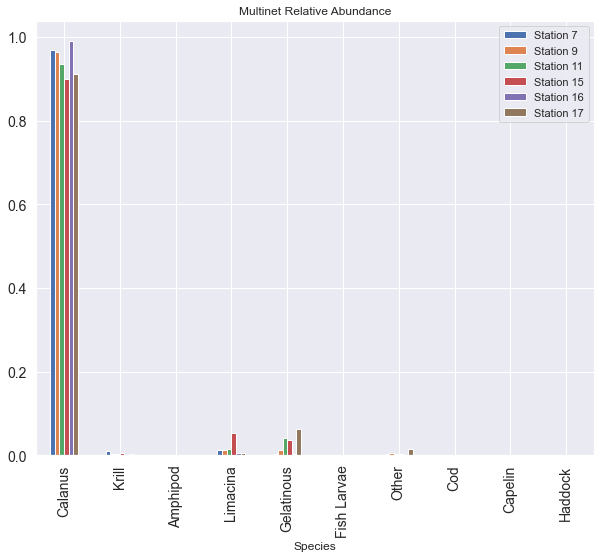

In [7]:
stn = [7,11,15,16,17]
Multinet_df[['Station 7','Station 9','Station 11','Station 15', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=14, title='Multinet Relative Abundance')


## Tucker Trawl data from selected stations
Tucket trawl 1000 μm mesh. The net was trawled for 15 min at 2 kn.
The depth of the tow varies with the station
Station 7 at 25 m
Station 11 at 30 m
Station 15 at 30 m
Station 16 at 20 m
Station 17 at 20 m

These depths at approx. in the middle of the Sailbuoy WBT mini 333 kHz range.

In [8]:
xls_Tucker = pd.ExcelFile('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_Tucker.xlsx')
Tucker_species = xls_Tucker.parse(2)
Tucker_species.index = Tucker_species['Species']
Tucker_species = Tucker_species.drop(['Species'], axis=1)

In [9]:
Tucker_species

,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17
Species,,,,,,,,,,,
Calanus sp.,48512,9024,18048,39488,26240,8192,26112,4448,4928,10752,1280
Thyssanoessa inermis,8320,1728,1600,3072,5120,2048,3840,1568,1600,4128,2608
Parathemisto abyssorum,1280,1280,1472,960,3200,1024,1664,512,1856,544,288
Limacina retroversa,9984,14848,704,2048,8192,6080,2496,1856,1408,3584,448
Munida rugosa,1664,2688,1664,1536,1664,704,1280,1632,800,96,144
Chaetognata (Eukrohnia ?),128,0,0,0,0,64,0,0,0,224,160
Aglantha digitale,128,0,0,0,0,0,0,0,224,160,32
Mertensia ovum,0,0,0,0,256,0,0,32,0,0,0
Gadidae juveniles,1792,64,192,0,128,128,128,64,96,160,64


In [10]:
Tucker_df = xls_Tucker.parse(0)
Tucker_df['Trawl']='Tucker'
Tucker_df.index = Tucker_df['Species']
Tucker_df = Tucker_df.drop(['Species'], axis=1)

In [11]:
Tucker_df[['Station 7','Station 8', 'Station 9', 'Station 10', 'Station 11', 'Station 12', 'Station 13', 'Station 14', 'Station 15', 'Station 16', 'Station 17']].round(3)

,Station 7,Station 8,Station 9,Station 10,Station 11,Station 12,Station 13,Station 14,Station 15,Station 16,Station 17
Species,,,,,,,,,,,
Calanus,0.651,0.301,0.758,0.834,0.584,0.448,0.730,0.430,0.452,0.547,0.254
Krill,0.112,0.058,0.067,0.066,0.114,0.112,0.107,0.152,0.147,0.210,0.517
Amphipod,0.017,0.043,0.062,0.020,0.071,0.056,0.047,0.050,0.170,0.028,0.057
Limacina,0.134,0.496,0.030,0.043,0.182,0.332,0.070,0.180,0.129,0.182,0.089
Gelatinous,0.003,0.000,0.000,0.000,0.006,0.003,0.000,0.003,0.021,0.020,0.038
Fish Larvae,0.024,0.004,0.011,0.001,0.006,0.010,0.011,0.006,0.009,0.008,0.013
Other,0.058,0.098,0.073,0.035,0.037,0.038,0.036,0.180,0.073,0.005,0.032
Cod,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Capelin,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


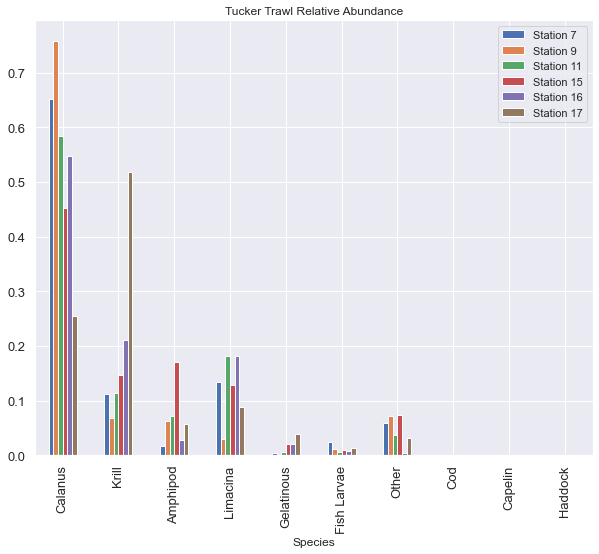

In [12]:
stn = [7,11,15,16,17]
trawl_depth = [25,30,30,20,20]
Tucker_df[['Station 7','Station 9','Station 11','Station 15', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=13, title='Tucker Trawl Relative Abundance')

Most stations have >=45% of Calanus and ~ 15% Krill. Station 17 has the opposite abundance with more Krill (51%) than Calanus (25%).

## Harstad pelagic Trawl

Harstad trawl with 8mm mesh size was deployed 11 times. Each deployment lasted between 20 and 40 minutes and the trawl depth was decided based on the
at a depth of 40-60. Station 15 was at 240 m, we will discard these values for the epipelagic study here. Depth was chosen based on mstrongest backscattering layer.

In [13]:
xls_Harstad = pd.ExcelFile('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_HarstadTrawl.xlsx')
Harstad_species = xls_Harstad.parse(2)
Harstad_species.index = Harstad_species['Species']

In [14]:
Harstad_species[['Station 7','Station 8', 'Station 9', 'Station 10', 'Station 12', 'Station 13', 'Station 16', 'Station 17']].round(3)

,Station 7,Station 8,Station 9,Station 10,Station 12,Station 13,Station 16,Station 17
Species,,,,,,,,
Gadus morhua,37.223,1.073,0.035,0.023,1.235,17.250,0.005,0.108
Mallotus villosus,10.453,2.147,0.052,0.040,0.020,40.770,0.000,0.000
Melanogrammus aeglefinus,0.000,0.160,0.060,0.017,0.090,0.063,0.168,0.000
Thissanoessa sp.,0.343,0.447,0.215,2.630,0.020,1.847,1.510,0.008
Thissanoessa inermis,0.157,0.267,0.015,0.337,0.160,0.167,0.000,0.073
Thissanoessa longicaudata,0.003,0.007,0.030,0.000,0.010,0.000,0.000,0.000
Meganyctiphanes sp.,0.000,0.000,0.000,1.350,0.000,0.000,0.000,0.000
Meganyctiphanes norvegica,0.000,0.000,0.000,0.330,0.000,0.000,0.000,0.000
Themisto sp.,0.010,0.000,0.010,0.080,0.070,0.000,0.000,0.000


In [24]:
Harstad_df = xls_Harstad.parse(0)
Harstad_df['Trawl']='Pelagic'
Harstad_df.index = Harstad_df['Species']
Harstad_df = Harstad_df.drop(['Species'], axis=1)

In [25]:
Harstad_df[['Station 7','Station 8', 'Station 9', 'Station 10','Station 12', 'Station 13',  'Station 16', 'Station 17']].round(3)

,Station 7,Station 8,Station 9,Station 10,Station 12,Station 13,Station 16,Station 17
Species,,,,,,,,
Calanus,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Krill,0.010,0.176,0.605,0.946,0.110,0.033,0.897,0.429
Amphipod,0.001,0.000,0.052,0.037,0.102,0.000,0.000,0.000
Limacina,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gelatinous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Fish Larvae,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Other,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000
Cod,0.771,0.262,0.081,0.005,0.718,0.287,0.003,0.571
Capelin,0.217,0.524,0.122,0.008,0.012,0.678,0.000,0.000


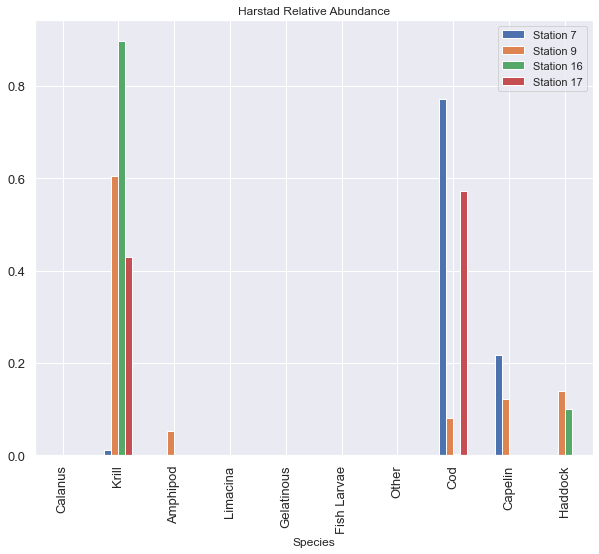

In [26]:
Harstad_df[['Station 7','Station 9', 'Station 16', 'Station 17']].plot.bar(figsize=(10,8), fontsize=13, title='Harstad Relative Abundance')

# Plot to compare per station

In [27]:
Trawl_df = pd.concat([Harstad_df,Multinet_df,Tucker_df])
Trawl_df.groupby(['Species','Trawl']).mean()


Station 7  Station 8  Station 9  Station 10  Station 12  \
Species     Trawl                                                               
Amphipod    Multinet   0.000000   0.000240   0.000759    0.000957    0.000561   
            Pelagic    0.001451   0.000000   0.052326    0.037339    0.101744   
            Tucker     0.017182   0.042735   0.061828    0.020270    0.055944   
Calanus     Multinet   0.968525   0.967915   0.964796    0.986873    0.944438   
            Pelagic    0.000000   0.000000   0.000000    0.000000    0.000000   
            Tucker     0.651203   0.301282   0.758065    0.833784    0.447552   
Capelin     Multinet   0.000000   0.000000   0.000000    0.000000    0.000000   
            Pelagic    0.216611   0.523577   0.122093    0.008147    0.011628   
            Tucker     0.000000   0.000000   0.000000    0.000000    0.000000   
Cod         Multinet   0.000000   0.000000   0.000000    0.000000    0.000000   
            Pelagic    0.771301   0.261789   0.081395    0.004752    0.718023   
            Tucker     0.000000   0.000000   0.000000    0.000000    0.000000   
Fish Larvae Multinet   0.000000   0.000129   0.000275    0.000045    0.000013   
            Pelagic    0.000000   0.000000   0.000000    0.000000    0.000000   
            Tucker     0.024055   0.004274   0.010753    0.001351    0.010490   
Gelatinous  Multinet   0.004113   0.007390   0.012874    0.005200    0.018544   
            Pelagic    0.000000   0.000000   0.000000    0.000000    0.000000   
            Tucker     0.003436   0.000000   0.000000    0.000000    0.003497   
Haddock     Multinet   0.000000   0.000000   0.000000    0.000000    0.000000   
            Pelagic    0.000000   0.039024   0.139535    0.003394    0.052326   
            Tucker     0.000000   0.000000   0.000000    0.000000    0.000000   
Krill       Multinet   0.009657   0.001062   0.003764    0.001212    0.005152   
            Pelagic    0.010430   0.175610   0.604651    0.946368    0.110465   
            Tucker     0.111684   0.057692   0.067204    0.066216    0.111888   
Limacina    Multinet   0.013234   0.019386   0.012054    0.003259    0.029295   
            Pelagic    0.000000   0.000000   0.000000    0.000000    0.000000   
            Tucker     0.134021   0.495726   0.029570    0.043243    0.332168   
Other       Multinet   0.004471   0.003879   0.005479    0.002455    0.001998   
            Pelagic    0.000207   0.000000   0.000000    0.000000    0.005814   
            Tucker     0.058419   0.098291   0.072581    0.035135    0.038462   

                      Station 13  Station 16  Station 17  Station 18  \
Species     Trawl                                                      
Amphipod    Multinet    0.000215    0.000166    0.000000         NaN   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.046512    0.027687    0.057143         NaN   
Calanus     Multinet    0.849436    0.989963    0.912676         NaN   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.729875    0.547231    0.253968         NaN   
Capelin     Multinet    0.000000    0.000000    0.000000         NaN   
            Pelagic     0.678106    0.000000    0.000000    0.281513   
            Tucker      0.000000    0.000000    0.000000         NaN   
Cod         Multinet    0.000000    0.000000    0.000000         NaN   
            Pelagic     0.286910    0.002972    0.571429    0.718487   
            Tucker      0.000000    0.000000    0.000000         NaN   
Fish Larvae Multinet    0.000030    0.000000    0.000000         NaN   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.010733    0.008143    0.012698         NaN   
Gelatinous  Multinet    0.008662    0.003775    0.063983         NaN   
            Pelagic     0.000000    0.000000    0.000000    0.000000   
            Tucker      0.000000    0.019544    0.038095     

In [38]:
Trawl_df.Trawl

Species
Calanus         Pelagic
Krill           Pelagic
Amphipod        Pelagic
Limacina        Pelagic
Gelatinous      Pelagic
Fish Larvae     Pelagic
Other           Pelagic
Cod             Pelagic
Capelin         Pelagic
Haddock         Pelagic
Calanus        Multinet
Krill          Multinet
Amphipod       Multinet
Limacina       Multinet
Gelatinous     Multinet
Fish Larvae    Multinet
Other          Multinet
Cod            Multinet
Capelin        Multinet
Haddock        Multinet
Calanus          Tucker
Krill            Tucker
Amphipod         Tucker
Limacina         Tucker
Gelatinous       Tucker
Fish Larvae      Tucker
Other            Tucker
Cod              Tucker
Capelin          Tucker
Haddock          Tucker
Name: Trawl, dtype: object

### Compare Trawls and Stations

In [33]:
stns = [7,9,11,15,16,17]
fig = plt.figure(figsize=(10,15))
for ind in range(len(stns)):
    station = 'Station '+str(stns[ind])
    
    g = sns.catplot(Trawl_df.index, Trawl_df[station], kind="bar", height=3, aspect=10/3)
    g.set(ylim=(0,1), title=station)
    g.set_axis_labels('Species', 'Relative abundance', size=15)


C:\Users\mbd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: object of type 'NoneType' has no len()

<Figure size 720x1080 with 0 Axes>

What do we see in the data?
- Multinet does not catch fish. 90% is Calanus. 
- Pelagic Trawl does not catch Calanus. It catches krill and fish

Is this a good way to show the data? Can you compare relative abundance of different methods? Maybe instead compare abundance? But then very different scales.